# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21_run8/result-lstm-tcp21-hl2-seq2-do0.2-oov4000-part_10_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_10_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,172.16.0.1-53186-192.168.10.50-21-tcp,0.416667,0,0,0,2060.911765,0,0,0
1,172.16.0.1-59534-192.168.10.50-21-tcp,0.206897,0,0,0,805.407407,0,0,0
2,172.16.0.1-57412-192.168.10.50-21-tcp,0.342857,0,0,0,837.272727,0,0,0
3,172.16.0.1-58576-192.168.10.50-21-tcp,0.351351,0,0,0,3515.111111,0,0,0
4,172.16.0.1-57616-192.168.10.50-21-tcp,0.459459,1,0,0,66752.171429,0,1,1


In [4]:
df_truth.head()

,ID,Label
0,172.16.0.1-53186-192.168.10.50-21-tcp,FTP-Patator
1,172.16.0.1-59534-192.168.10.50-21-tcp,FTP-Patator
2,172.16.0.1-57412-192.168.10.50-21-tcp,FTP-Patator
3,172.16.0.1-58576-192.168.10.50-21-tcp,FTP-Patator
4,172.16.0.1-57616-192.168.10.50-21-tcp,FTP-Patator


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        542
1          2
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        542
1          2
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           543
1             1
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0    FTP-Patator
1    FTP-Patator
2    FTP-Patator
3    FTP-Patator
4    FTP-Patator
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0         172.16.0.1-53186-192.168.10.50-21-tcp
1         172.16.0.1-59534-192.168.10.50-21-tcp
2         172.16.0.1-57412-192.168.10.50-21-tcp
3         172.16.0.1-58576-192.168.10.50-21-tcp
4         172.16.0.1-57616-192.168.10.50-21-tcp
                         ...                   
539    192.168.10.15-53261-192.168.10.50-21-tcp
540    192.168.10.16-34924-192.168.10.50-21-tcp
541    192.168.10.16-50440-192.168.10.50-21-tcp
542      192.168.10.9-6170-192.168.10.50-21-tcp
543    192.168.10.51-60554-192.168.10.50-21-tcp
Name: id, Length: 544, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0         172.16.0.1-53186-192.168.10.50-21-tcp
1         172.16.0.1-59534-192.168.10.50-21-tcp
2         172.16.0.1-57412-192.168.10.50-21-tcp
3         172.16.0.1-58576-192.168.10.50-21-tcp
4         172.16.0.1-57616-192.168.10.50-21-tcp
                         ...                   
539    192.168.10.15-53261-192.168.10.50-21-tcp
540    192.168.10.16-34924-192.168.10.50-21-tcp
541    192.168.10.16-50440-192.168.10.50-21-tcp
542      192.168.10.9-6170-192.168.10.50-21-tcp
543    192.168.10.51-60554-192.168.10.50-21-tcp
Name: ID, Length: 544, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,172.16.0.1-53186-192.168.10.50-21-tcp,0.416667,0,0,0,2060.911765,0,0,0,1
1,172.16.0.1-59534-192.168.10.50-21-tcp,0.206897,0,0,0,805.407407,0,0,0,1
2,172.16.0.1-57412-192.168.10.50-21-tcp,0.342857,0,0,0,837.272727,0,0,0,1
3,172.16.0.1-58576-192.168.10.50-21-tcp,0.351351,0,0,0,3515.111111,0,0,0,1
4,172.16.0.1-57616-192.168.10.50-21-tcp,0.459459,1,0,0,66752.171429,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
491,172.16.0.1-59398-192.168.10.50-21-tcp,0.279661,0,0,0,91451.379310,0,1,1,1
492,172.16.0.1-56664-192.168.10.50-21-tcp,0.375000,0,0,0,735.166667,0,0,0,1
493,172.16.0.1-59184-192.168.10.50-21-tcp,0.393939,0,0,0,108226.709677,1,1,1,1
494,172.16.0.1-57960-192.168.10.50-21-tcp,0.322034,0,0,0,9948.439655,0,0,0,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
496,192.168.10.15-57087-192.168.10.50-21-tcp,0.356322,0,0,0,3874.517647,0,0,0,0
497,192.168.10.14-54119-192.168.10.50-21-tcp,0.402299,0,0,0,2732.894118,0,0,0,0
498,192.168.10.12-53212-192.168.10.50-21-tcp,0.402299,0,0,0,6500.058824,0,0,0,0
499,192.168.10.12-35396-192.168.10.50-21-tcp,0.356322,0,0,0,3723.929412,0,0,0,0
500,192.168.10.12-59788-192.168.10.50-21-tcp,0.390805,0,0,0,8518.776471,0,0,0,0
501,192.168.10.14-54136-192.168.10.50-21-tcp,0.379310,0,0,0,3859.823529,0,0,0,0
502,192.168.10.14-54835-192.168.10.50-21-tcp,0.367816,0,0,0,2388.823529,0,0,0,0
503,192.168.10.17-55937-192.168.10.50-21-tcp,0.390805,0,0,0,5457.035294,0,0,0,0
504,192.168.10.51-36201-192.168.10.50-21-tcp,0.344828,0,0,0,3035.129412,0,0,0,0
505,192.168.10.12-59268-192.168.10.50-21-tcp,0.379310,0,0,0,7513.164706,0,0,0,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,172.16.0.1-53186-192.168.10.50-21-tcp,0.416667,0,0,0,2060.911765,0,0,0,1
1,172.16.0.1-59534-192.168.10.50-21-tcp,0.206897,0,0,0,805.407407,0,0,0,1
2,172.16.0.1-57412-192.168.10.50-21-tcp,0.342857,0,0,0,837.272727,0,0,0,1
3,172.16.0.1-58576-192.168.10.50-21-tcp,0.351351,0,0,0,3515.111111,0,0,0,1
4,172.16.0.1-57616-192.168.10.50-21-tcp,0.459459,1,0,0,66752.171429,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
539,192.168.10.15-53261-192.168.10.50-21-tcp,0.379310,0,0,0,7816.529412,0,0,0,0
540,192.168.10.16-34924-192.168.10.50-21-tcp,0.367816,0,0,0,2731.611765,0,0,0,0
541,192.168.10.16-50440-192.168.10.50-21-tcp,0.379310,0,0,0,5414.482353,0,0,0,0
542,192.168.10.9-6170-192.168.10.50-21-tcp,0.379310,0,0,0,4503.611765,0,0,0,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        496
0         48
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
539,0
540,0
541,0
542,0


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.10080645161290322
Recall-Binary-b_iqr: 0.004032258064516129
Recall-Binary-b_zscore: 0.0020161290322580645
Recall-Floating-f_mean: 0.16330645161290322
Recall-Floating-f_iqr: 0.2903225806451613
Recall-Floating-f_zscore: 0.3810483870967742


### Confussion Matrix

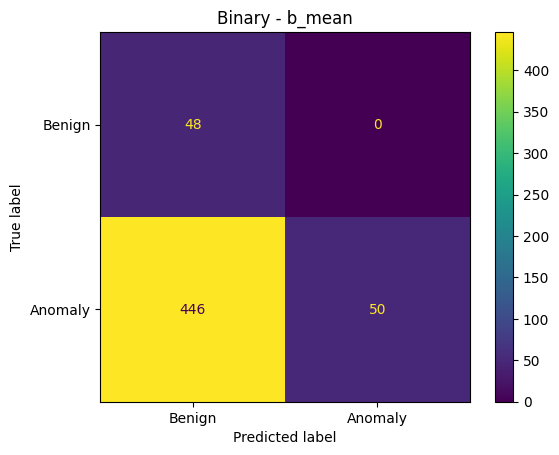

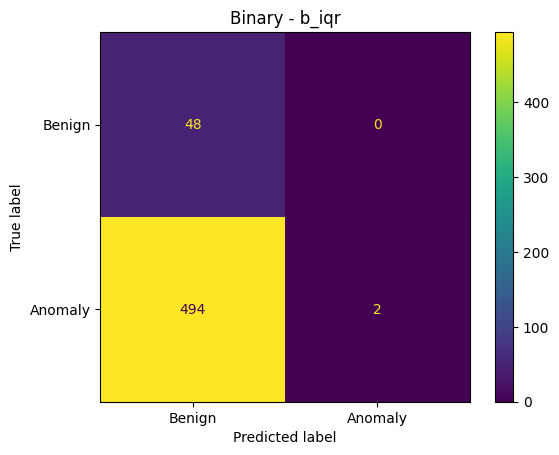

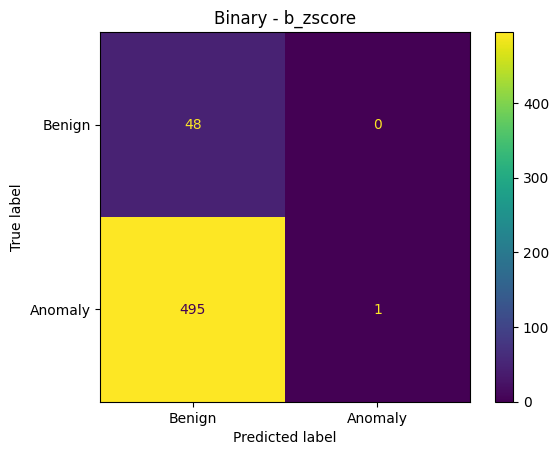

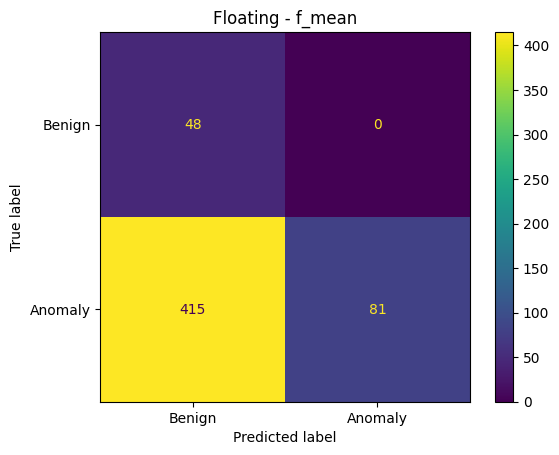

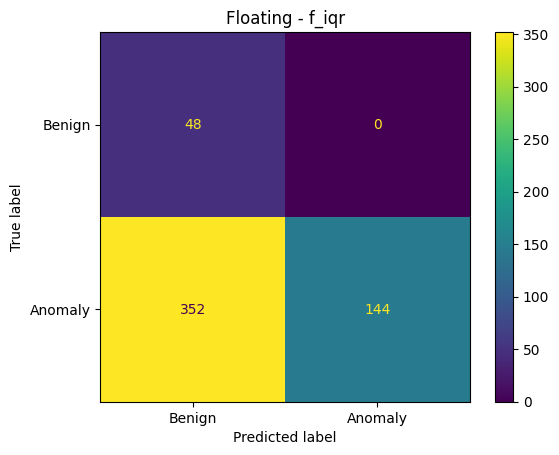

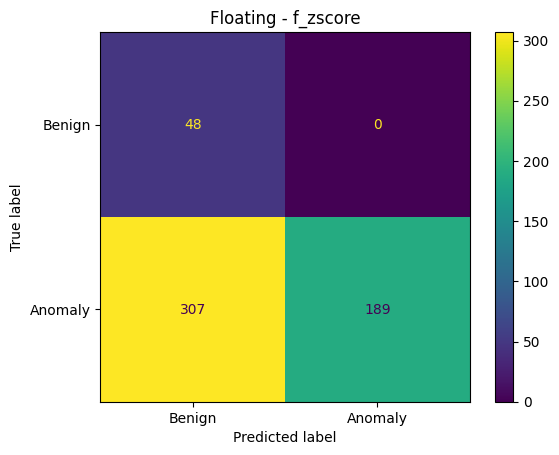

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.12291052114060963
F2-Binary-b_iqr: 0.005035246727089627
F2-Binary-b_zscore: 0.0025188916876574307
F2-Floating-f_mean: 0.19612590799031476
F2-Floating-f_iqr: 0.3383458646616541
F2-Floating-f_zscore: 0.43488265071329957


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.0
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.0
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.1801470588235294
Accuracy-Binary-b_iqr: 0.09191176470588236
Accuracy-Binary-b_zscore: 0.0900735294117647
Accuracy-Floating-f_mean: 0.23713235294117646
Accuracy-Floating-f_iqr: 0.35294117647058826
Accuracy-Floating-f_zscore: 0.43566176470588236


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.100806,0.122911,0.0,0.180147
b_iqr,0.004032,0.005035,0.0,0.091912
b_zscore,0.002016,0.002519,0.0,0.090074
f_mean,0.163306,0.196126,0.0,0.237132
f_iqr,0.290323,0.338346,0.0,0.352941
f_zscore,0.381048,0.434883,0.0,0.435662


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl